In [1]:
using Printf
using Random
using LinearAlgebra
using Interact
rng = MersenneTwister(18);

┌ Info: Precompiling Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1278


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-13250443377621033076\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-1353696886424866150\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-13250443377621033076\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
function Arnoldi_Compute_Hk(A,q,kmax)
    H = zeros(kmax, kmax)
    r = copy(q[:,1])
    q[:,1] = r / norm(r)
    
    for k = 1:kmax
        if k > 1
            q[:,k] = r / H[k,k-1]
        end

        r = A * q[:,k] # Multiply by A
        for i=1:k
            # Make vector orthogonal
            H[i,k] = dot(q[:,i], r)
            r -= H[i,k] * q[:,i]
        end

        if k<kmax
            H[k+1,k] = norm(r)
        end
    end
    return H
end

function eig_k(H,k)
    Hk = H[1:k,1:k]
    L = eigen(Hk).values # Eigenvalue estimates at step k        
    return L    
end

eig_k (generic function with 1 method)

In [3]:
n = 128

# Case 1
nh = div(n,2)
@assert 2*nh == n
θ = 2*π*rand(nh)
D = sqrt.(rand(nh)) .* (cos.(θ) + sin.(θ)*im)
D = [D;conj(D)]
D[nh] = 2
D[n] = 2
X = rand(n,nh) + rand(n,nh)*im
X = hcat(X,conj(X))

# Case 2
# X = rand(n,n)
# D = cos(linspace(0,π,n))

A = real( X * diagm(0 => D) / X )

kmax = n # Size of Arnoldi space

q = zeros(n,kmax)
# Random starting vector
q[:,1] = rand(n)
q[:,1] /= norm(q[:,1])

Hk = Arnoldi_Compute_Hk(A,q,kmax);

In [4]:
function lt(z1,z2)
    if abs( abs(z1)-abs(z2) ) > eps(Float32) * (abs(z1) + abs(z2))
        return abs(z1) < abs(z2)
    elseif abs( real(z1-z2) ) > eps(Float32) * (abs(z1) + abs(z2))
        return real(z1) < real(z2)
    else
        return imag(z1) < imag(z2)
    end
end

lt (generic function with 1 method)

In [5]:
# Testing accuracy
D = eigen(A).values; D1 = eigen(Hk).values
sort!(D, lt=lt); sort!(D1, lt=lt)
@show norm(D-D1) / norm(D)

norm(D - D1) / norm(D) = 1.1747934625375197e-14


1.1747934625375197e-14

In [6]:
include("../load_plot_pkg.jl")
output = false

false

In [7]:
# Pre-computing all the data we are going to plot
L = zeros(ComplexF64,n,kmax)
for k=1:kmax
    L[1:k,k] = eig_k(Hk,k)
end

@manipulate for k=1:kmax
    t1 = scatter(x=real(D),y=imag(D),name="A",mode="markers")
    t2 = scatter(x=real(L[1:k,k]),y=imag(L[1:k,k]),name="Arnoldi",mode="markers")
    l = PlotlyJS.Layout(xaxis_title="Real part",yaxis_title="Imaginary part",
        yaxis_scaleanchor="x",yaxis_scaleratio=1,
        xaxis_range=[-1.1,2.1],yaxis_range=[-1.1,1.1],
        width=700,height=550,margin_l=80)
    plot([t1,t2],l)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["k"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 128,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
64, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/darve/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/darve/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/darve/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/Users/darve/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/Users/darve/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000110495b10, Task (runnable) @0x0000000110495b10), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37

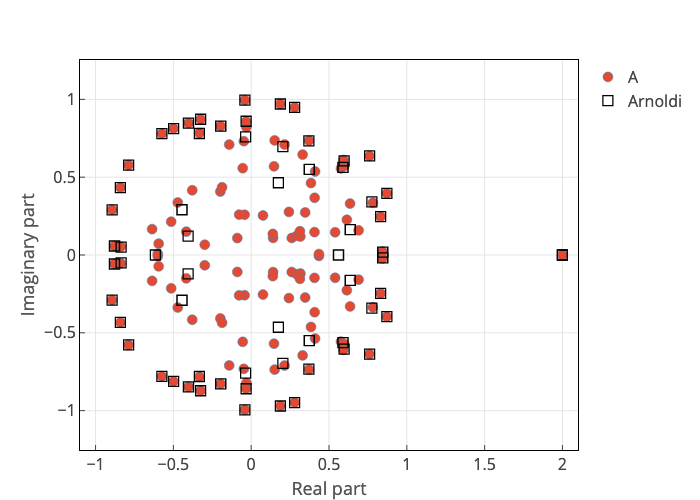

In [8]:
k = 64
t1 = scatter(x=real(D),y=imag(D),name="A",mode="markers")
t2 = scatter(x=real(L[1:k,k]),y=imag(L[1:k,k]),name="Arnoldi",mode="markers",
    marker=attr(symbol="square-open",line_width=1.3,color="black"))
l = PlotlyJS.Layout(xaxis_title="Real part",yaxis_title="Imaginary part",
    yaxis_scaleanchor="x",yaxis_scaleratio=1,
    xaxis_range=[-1.1,2.1],yaxis_range=[-1.1,1.1],
    width=500,height=300,margin_l=80)
p = plot([t1,t2],l)

In [9]:
if output
    plotToPDF(p,"arnoldi")
end